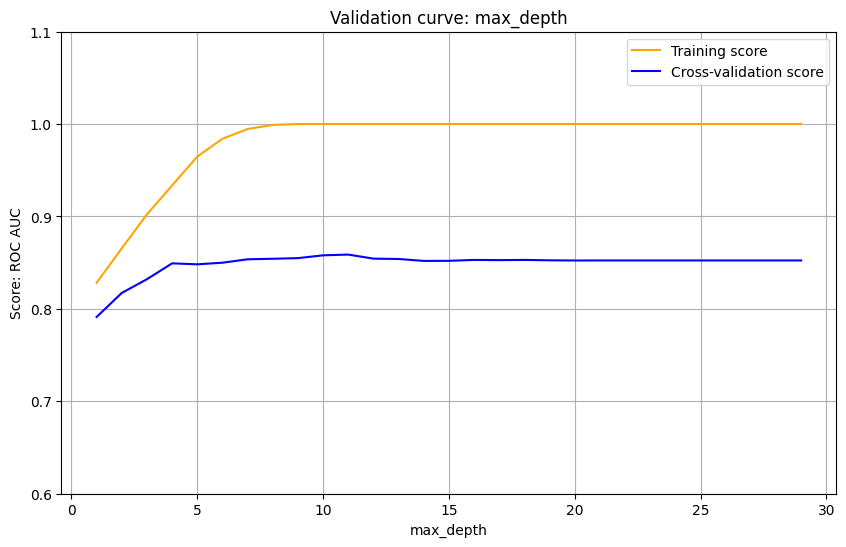

Best cross-validation score: 0.8587
Best max_depth: 11


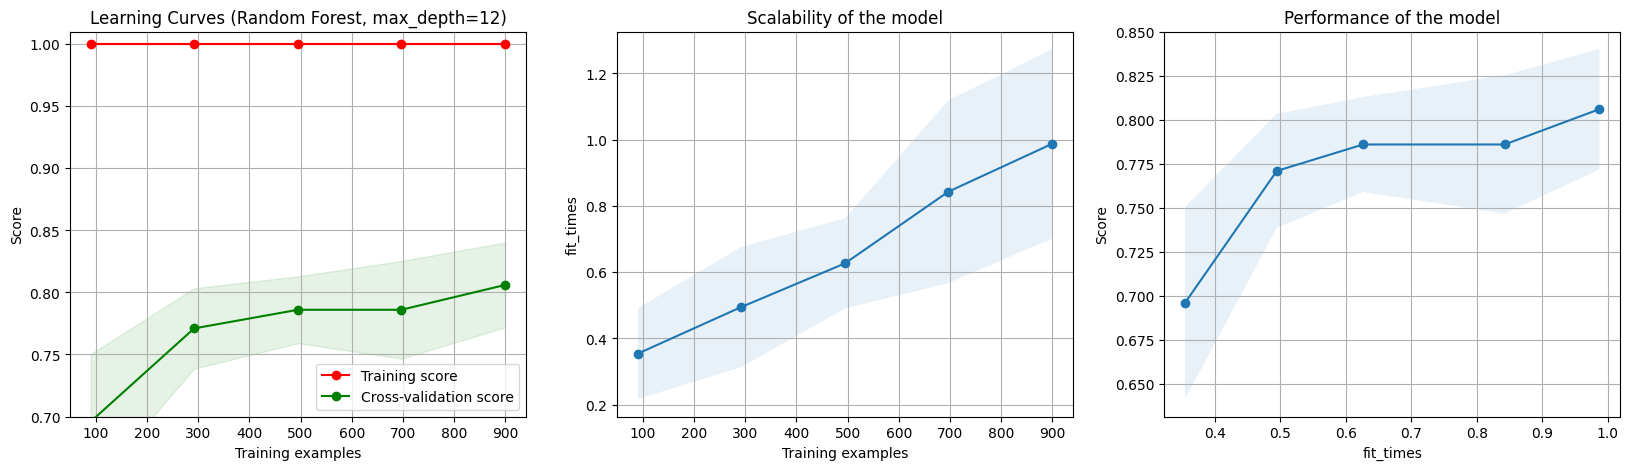

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000,
                           n_features=30,
                           n_informative=10,
                           flip_y=0.2,
                           random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=1)
param_range = np.arange(1, 30)

train_scores, test_scores = validation_curve(
    rf, X, y,
    param_name="max_depth",
    param_range=param_range,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation curve: max_depth")
plt.xlabel("max_depth")
plt.ylabel("Score: ROC AUC")
plt.ylim(0.6, 1.1)

plt.plot(param_range, train_mean, label="Training score", color="orange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.legend(loc="best")
plt.grid()
plt.show()

best_max_depth = param_range[np.argmax(test_mean)]
print(f"Best cross-validation score: {np.max(test_mean):.4f}")
print(f"Best max_depth: {best_max_depth}")

clf = RandomForestClassifier(max_depth=12, random_state=42)

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

plot_learning_curve(clf, "Learning Curves (Random Forest, max_depth=12)", X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1)
plt.show()